# Analysis of the competition

This notebook contains analyses of the **`Copa America 2021`**. The analyses included are: `Ball progression`, `Pressing`, `Shot performance`, `Defensive performance`, among others. Inspiration is primarly taken from [@Odriozolite](https://twitter.com/Odriozolite), [NinadB_06](https://twitter.com/NinadB_06), and [@exceedingxpuns](https://twitter.com/exceedingxpuns).

## Load libraries

In [695]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects
import matplotlib.lines as lines
import seaborn as sns

from highlight_text import htext
from matplotlib.offsetbox import OffsetImage,AnchoredOffsetbox,AnnotationBbox
from mplsoccer import Pitch, VerticalPitch
from PIL import Image

In [605]:
pd.set_option('display.max_columns', 100)

## Set constants

In [606]:
countries = ['argentina', 'bolivia', 'brazil', 'colombia', 'chile', 'ecuador', 'paraguay', 'peru', 
             'uruguay', 'venezuela']

title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "black"
background = "white"
filler = "grey"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

colors = {'argentina':'#4A8ABD', 'bolivia':'#C8C656', 'brazil':'#61AA4F', 'colombia':'#919191' , 
          'chile':'#D25041', 'ecuador': '#F49845', 'paraguay': '#976C60', 'peru': '#F3B0AB', 'uruguay': '#60B9C7',
          'venezuela': '#9F81C5'}

## 1. Ball progression among fullbacks

This analysis is inspired in [@Odriozolite](https://twitter.com/Odriozolite) who published the analysis [here](https://twitter.com/Odriozolite/status/1470770951000371207). It involves data about `progressive passes`, `progressive carries` and `number of touches`.

### Load data

In [4]:
# load passing
passing_df = pd.DataFrame()
for country in countries:
    if passing_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_passing.csv")
        aux_df['country'] = country
        passing_df = passing_df.append(aux_df, ignore_index=True, sort=False)
    else:
        passing_df = pd.read_csv(f"data/{country}_passing.csv")
        passing_df['country'] = country        

In [5]:
# load possession
possession_df = pd.DataFrame()
for country in countries:
    if possession_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_possession.csv")
        aux_df['country'] = country
        possession_df = possession_df.append(aux_df, ignore_index=True, sort=False)
    else:
        possession_df = pd.read_csv(f"data/{country}_possession.csv")
        possession_df['country'] = country        

In [62]:
# merge datasets
analysis_df = pd.merge(passing_df, possession_df, how='inner', 
                       on=['player', 'pos', 'age', '90s', 'matches', 'country'])

### Check data

In [63]:
print(f"The dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The dataset contains 253 rows and 52 columns


In [64]:
analysis_df.head()

,player,pos,age,90s,total_cmp,total_att,total_cmp%,total_totdist,total_prgdist,short_cmp,short_att,short_cmp%,medium_cmp,medium_att,medium_cmp%,long_cmp,long_att,long_cmp%,ast,xa,a-xa,kp,1/3,ppa,crspa,prog,matches,country,touches_touches,touches_def pen,touches_def 3rd,touches_mid 3rd,touches_att 3rd,touches_att pen,touches_live,dribbles_succ,dribbles_att,dribbles_succ%,dribbles_#pl,dribbles_megs,carries_carries,carries_totdist,carries_prgdist,carries_prog,carries_1/3,carries_cpa,carries_mis,carries_dis,receiving_targ,receiving_rec,receiving_rec%,receiving_prog
0,Lionel Messi,"FW,MF",33.0,7.3,249,323,77.1,4417,1525,117,139,84.2,88,107,82.2,33,51,64.7,5,2.9,2.1,22,31,11,1,42,Matches,argentina,432,1,27,193,254,36,389,33,47,70.2,36,0,354,2085,1306,71,25,12,13,27,378,321,84.9,32
1,Emiliano Martínez,GK,28.0,6.3,111,163,68.1,3741,2449,15,15,100.0,54,55,98.2,41,91,45.1,0,0.0,0.0,0,5,0,0,0,Matches,argentina,171,156,171,0,0,0,122,0,0,NaN,0,0,92,477,290,0,0,0,0,0,68,68,100.0,0
2,Rodrigo De Paul,MF,26.0,5.5,211,247,85.4,4157,999,87,100,87.0,83,93,89.2,34,44,77.3,1,0.8,0.2,8,18,5,0,22,Matches,argentina,305,3,75,140,119,7,281,3,10,30.0,5,0,224,1265,670,29,10,1,3,7,226,202,89.4,13
3,Nicolás Otamendi,DF,32.0,5.3,175,199,87.9,3621,1098,53,61,86.9,96,105,91.4,26,31,83.9,0,0.0,0.0,1,13,0,0,9,Matches,argentina,258,43,144,130,6,3,242,0,0,NaN,0,0,150,1158,777,16,2,0,1,0,164,163,99.4,1
4,Lautaro Martínez,FW,23.0,4.9,41,57,71.9,555,22,25,27,92.6,12,19,63.2,2,6,33.3,0,0.0,0.0,1,2,0,0,0,Matches,argentina,129,7,18,54,61,20,123,8,9,88.9,9,1,76,185,85,3,0,1,10,11,135,75,55.6,19


### Filter data

**Remove goalkeepers**

In [65]:
analysis_df = analysis_df[analysis_df['pos'] != 'GK']

In [66]:
print(f"After removing GKs the dataset contains {analysis_df.shape[0]} players")

After removing GKs the dataset contains 236 players


**Remove players who play less than 50% of the team's played minutes**

In [67]:
min_teams_played = analysis_df.loc[analysis_df['player']=='Squad Total', ['country', '90s']]

In [108]:
analysis_fdf = pd.DataFrame()
for country in countries:
    team = analysis_df[analysis_df['country']==country]
    min_team_played = min_teams_played.loc[min_teams_played['country']==country, '90s'].values[0]
    if analysis_fdf.size > 0:
        analysis_fdf = analysis_fdf.append(team[team['90s'] >= (min_team_played/2)], ignore_index=True, 
                                           sort=False)
    else:
        analysis_fdf = team[team['90s'] >= (min_team_played/2)]

**Remove summary rows**

In [109]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Squad Total']
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Opponent Total']

In [110]:
print(f"There are {analysis_fdf.shape[0]} players who played more than 50% of their teams' minutes")

There are 96 players who played more than 50% of their teams' minutes


**Select fullbacks**

In [111]:
fullbacks = ['Marcos Acuña', 'Gonzalo Montiel', 'Nicolás Tagliafico', 'Roberto Fernández', 'Diego Bejarano', 
             'Danilo', 'Renan Lodi', 'Daniel Muñoz', 'Mauricio Isla', 'Eugenio Mena', 'Pervis Estupiñán',
             'Ángelo Preciado', 'Júnior Alonso', 'Alberto Espínola', 'Santiago Arzamendia', 'Héctor David Martínez',
             'Aldo Corzo', 'Miguel Trauco', 'Matías Viña', 'Alexander González']

In [112]:
analysis_fdf.loc[analysis_fdf['player'].isin(fullbacks), 'pos'] = 'FB' 

In [116]:
analysis_fdf = analysis_fdf.loc[analysis_fdf['pos'] == 'FB']

In [117]:
print(f'There are {analysis_fdf.shape[0]} fullbacks')

There are 20 fullbacks


**Select columns**

In [118]:
cols = ['player', 'pos', 'country', '90s', 'prog', 'carries_prog', 'touches_touches', 'total_cmp', 'touches_live']

In [119]:
analysis_fdf = analysis_fdf[cols]

**Compute columns**

In [120]:
avg_completed_passes = analysis_fdf['total_cmp'].mean()

In [121]:
avg_completed_passes_by_country = analysis_fdf.groupby(by='country', as_index=False)['total_cmp'].mean()

In [122]:
avg_completed_passes_by_country.columns = ['country', 'avg_cmp_pass']

In [123]:
analysis_fdf['prog_pass/90'] = analysis_fdf['prog']/analysis_fdf['90s']

In [124]:
def compute_normalized_team_passes(row, avg_passes_competition, avg_passes_countries):
    avg_passes_country = \
        avg_passes_countries.loc[avg_passes_countries['country']==row['country'],'avg_cmp_pass'].values[0]
    return row['prog_pass/90'] * (avg_passes_country/avg_passes_competition)

In [125]:
analysis_fdf['norm_cmp_pass'] = analysis_fdf.apply(compute_normalized_team_passes, 
                                                   avg_passes_competition=avg_completed_passes, 
                                                   avg_passes_countries=avg_completed_passes_by_country,
                                                   axis=1)

In [126]:
analysis_fdf['prog_carries/90'] = analysis_fdf['carries_prog']/analysis_fdf['90s']

In [127]:
analysis_fdf['norm_prog_carries'] = analysis_fdf['prog_carries/90'] * (analysis_fdf['touches_live']/100)

In [129]:
analysis_fdf.head()

,player,pos,country,90s,prog,carries_prog,touches_touches,total_cmp,touches_live,prog_pass/90,norm_cmp_pass,prog_carries/90,norm_prog_carries
7,Marcos Acuña,FB,argentina,4.0,12,20,242,173,218,3.000000,2.308559,5.000000,10.900000
9,Gonzalo Montiel,FB,argentina,3.8,5,6,196,142,174,1.315789,1.012526,1.578947,2.747368
10,Nicolás Tagliafico,FB,argentina,3.7,11,8,151,95,128,2.972973,2.287761,2.162162,2.767568
16,Roberto Fernández,FB,bolivia,3.2,11,21,192,115,176,3.437500,2.071016,6.562500,11.550000
17,Diego Bejarano,FB,bolivia,3.0,7,10,146,99,123,2.333333,1.405781,3.333333,4.100000


### Draw scatterplot

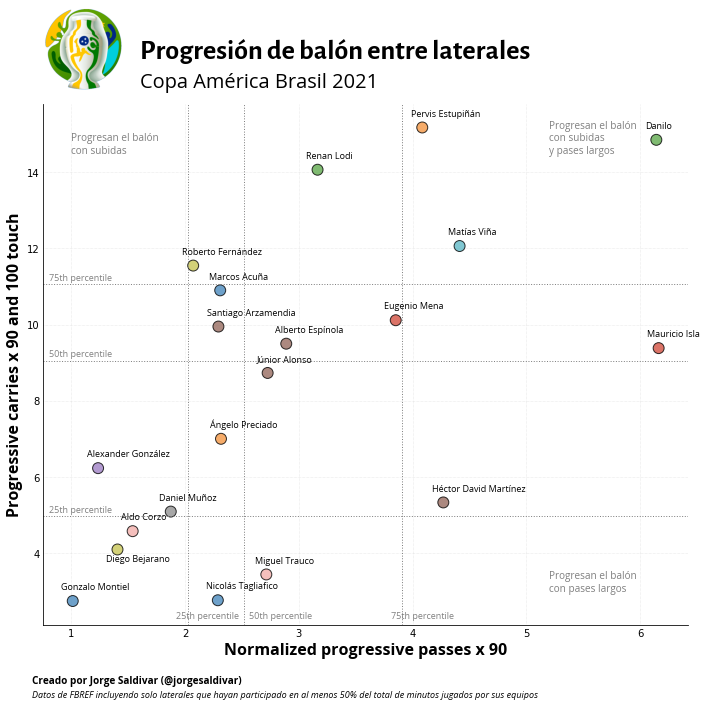

In [170]:
fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)

x = analysis_fdf['norm_cmp_pass'].values
y = analysis_fdf['norm_prog_carries'].values


ax.scatter(x, y, s=120, color=analysis_fdf['country'].map(colors), alpha=0.8, lw=1, zorder=2, edgecolor='black')
# add horizontal lines
ax.axhline(y=np.quantile(y, 0.25), color='gray', linestyle='dotted', lw=1)
ax.axhline(y=np.median(y), color='gray', linestyle='dotted', lw=1)
ax.axhline(y=np.quantile(y, 0.75), color='gray', linestyle='dotted', lw=1)
# add vertical lines
ax.axvline(x=np.quantile(x, 0.25), color='gray', linestyle='dotted', lw=1)
ax.axvline(x=np.median(x), color='gray', linestyle='dotted', lw=1)
ax.axvline(x=np.quantile(x, 0.75), color='gray', linestyle='dotted', lw=1)


fig.text(0.2,1.06,"Progresión de balón entre laterales",fontweight="bold", fontsize=28, fontfamily=title_font, 
         color=text_color)
fig.text(0.2,1.01,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, color=text_color)

ax.set_xlabel("Normalized progressive passes x 90", fontfamily=body_font, fontweight="bold", fontsize=16, 
              color=text_color)
ax.set_ylabel("Progressive carries x 90 and 100 touch", fontfamily=body_font, fontweight="bold", fontsize= 16, 
              color=text_color)

ax.tick_params(axis="both",length=0)


spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

# add percentiles annotations
ax.annotate('25th percentile', (0.8, np.quantile(y,0.25)+0.1), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('50th percentile', (0.8, np.quantile(y,0.50)+0.1), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('75th percentile', (0.8, np.quantile(y,0.75)+0.1), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('25th percentile', (np.quantile(x,0.25)-0.1, 2.3), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('50th percentile', (np.quantile(x,0.50)+0.05, 2.3), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('75th percentile', (np.quantile(x,0.75)-0.1, 2.3), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)

# add players' names
for i, txt in enumerate(analysis_fdf['player']):
    delta_x = -0.1
    delta_y = 0.3
    # In some cases put the name below the dot
    if txt in ['Diego Bejarano']:
        delta_y = -0.3
    ax.annotate(txt, (x[i]+delta_x, y[i]+delta_y), fontfamily=body_font, fontweight="regular", fontsize=9, 
                color=text_color, zorder=3)

# add understanding info
ax.annotate('Progresan el balón\ncon subidas\ny pases largos',(5.2, 14.5), fontfamily=body_font, 
            fontweight="regular", fontsize=10, color='gray', zorder=3)
ax.annotate('Progresan el balón\ncon subidas', (1, 14.5), fontfamily=body_font, fontweight="regular", 
            fontsize=10, color='gray', zorder=3)
ax.annotate('Progresan el balón\ncon pases largos', (5.2, 3), fontfamily=body_font, fontweight="regular", 
            fontsize=10, color='gray', zorder=3)

ax2 = fig.add_axes([0.02,1,0.20,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)
        
        
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.025, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF incluyendo solo laterales que hayan participado en al menos 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.05, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.savefig("outputs/progessive_ball_fb.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()

## 2. Ball progression among central midfielders

This analysis is inspired in [@Odriozolite](https://twitter.com/Odriozolite) who published the analysis [here](https://twitter.com/Odriozolite/status/1470412416869490696). It involves data about `progressive passes`, `progressive carries` and `number of live touches`.

### Load data

In [171]:
# load passing
passing_df = pd.DataFrame()
for country in countries:
    if passing_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_passing.csv")
        aux_df['country'] = country
        passing_df = passing_df.append(aux_df, ignore_index=True, sort=False)
    else:
        passing_df = pd.read_csv(f"data/{country}_passing.csv")
        passing_df['country'] = country        

In [172]:
# load possession
possession_df = pd.DataFrame()
for country in countries:
    if possession_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_possession.csv")
        aux_df['country'] = country
        possession_df = possession_df.append(aux_df, ignore_index=True, sort=False)
    else:
        possession_df = pd.read_csv(f"data/{country}_possession.csv")
        possession_df['country'] = country        

In [173]:
# merge datasets
analysis_df = pd.merge(passing_df, possession_df, how='inner', 
                       on=['player', 'pos', 'age', '90s', 'matches', 'country'])

### Check data

In [174]:
print(f"The dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The dataset contains 253 rows and 52 columns


In [175]:
analysis_df.head()

,player,pos,age,90s,total_cmp,total_att,total_cmp%,total_totdist,total_prgdist,short_cmp,short_att,short_cmp%,medium_cmp,medium_att,medium_cmp%,long_cmp,long_att,long_cmp%,ast,xa,a-xa,kp,1/3,ppa,crspa,prog,matches,country,touches_touches,touches_def pen,touches_def 3rd,touches_mid 3rd,touches_att 3rd,touches_att pen,touches_live,dribbles_succ,dribbles_att,dribbles_succ%,dribbles_#pl,dribbles_megs,carries_carries,carries_totdist,carries_prgdist,carries_prog,carries_1/3,carries_cpa,carries_mis,carries_dis,receiving_targ,receiving_rec,receiving_rec%,receiving_prog
0,Lionel Messi,"FW,MF",33.0,7.3,249,323,77.1,4417,1525,117,139,84.2,88,107,82.2,33,51,64.7,5,2.9,2.1,22,31,11,1,42,Matches,argentina,432,1,27,193,254,36,389,33,47,70.2,36,0,354,2085,1306,71,25,12,13,27,378,321,84.9,32
1,Emiliano Martínez,GK,28.0,6.3,111,163,68.1,3741,2449,15,15,100.0,54,55,98.2,41,91,45.1,0,0.0,0.0,0,5,0,0,0,Matches,argentina,171,156,171,0,0,0,122,0,0,NaN,0,0,92,477,290,0,0,0,0,0,68,68,100.0,0
2,Rodrigo De Paul,MF,26.0,5.5,211,247,85.4,4157,999,87,100,87.0,83,93,89.2,34,44,77.3,1,0.8,0.2,8,18,5,0,22,Matches,argentina,305,3,75,140,119,7,281,3,10,30.0,5,0,224,1265,670,29,10,1,3,7,226,202,89.4,13
3,Nicolás Otamendi,DF,32.0,5.3,175,199,87.9,3621,1098,53,61,86.9,96,105,91.4,26,31,83.9,0,0.0,0.0,1,13,0,0,9,Matches,argentina,258,43,144,130,6,3,242,0,0,NaN,0,0,150,1158,777,16,2,0,1,0,164,163,99.4,1
4,Lautaro Martínez,FW,23.0,4.9,41,57,71.9,555,22,25,27,92.6,12,19,63.2,2,6,33.3,0,0.0,0.0,1,2,0,0,0,Matches,argentina,129,7,18,54,61,20,123,8,9,88.9,9,1,76,185,85,3,0,1,10,11,135,75,55.6,19


### Filter data

**Remove players who play less than 50% of the team's played minutes**

In [176]:
min_teams_played = analysis_df.loc[analysis_df['player']=='Squad Total', ['country', '90s']]

In [177]:
analysis_fdf = pd.DataFrame()
for country in countries:
    team = analysis_df[analysis_df['country']==country]
    min_team_played = min_teams_played.loc[min_teams_played['country']==country, '90s'].values[0]
    if analysis_fdf.size > 0:
        analysis_fdf = analysis_fdf.append(team[team['90s'] >= (min_team_played/2)], ignore_index=True, 
                                           sort=False)
    else:
        analysis_fdf = team[team['90s'] >= (min_team_played/2)]

**Remove summary rows**

In [178]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Squad Total']
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Opponent Total']

In [179]:
print(f"There are {analysis_fdf.shape[0]} players who played more than 50% of their teams' minutes")

There are 106 players who played more than 50% of their teams' minutes


**Select midfielders**

In [183]:
central_midfielders = ['Rodrigo De Paul', 'Guido Rodríguez', 'Leandro Paredes', 'Giovani Lo Celso', 'Leonel Justiniano',
                       'Fred', 'Casemiro', 'Wílmar Barrios', 'Edwin Cardona', 'Charles Aránguiz', 'Arturo Vidal',
                       'Erick Pulgar', 'Jhegson Méndez', 'Moisés Caicedo', 'Alan Franco', 'Mathías Villasanti', 
                       'Yoshimar Yotún', 'Renato Tapia', 'Sergio Peña', 'Federico Valverde', 'Matías Vecino', 
                       'Nicolás De La Cruz', 'Nahitan Nández', 'Rodrigo Bentancur', 'Junior Moreno', 
                       'Cristian Cásseres Jr.', 'José Andrés Martínez']

In [184]:
analysis_fdf.loc[analysis_fdf['player'].isin(central_midfielders), 'pos'] = 'CM' 

In [185]:
analysis_fdf = analysis_fdf.loc[analysis_fdf['pos'] == 'CM']

In [186]:
print(f'There are {analysis_fdf.shape[0]} central midfielders')

There are 27 central midfielders


**Select columns**

In [187]:
cols = ['player', 'pos', 'country', '90s', 'prog', 'carries_prog', 'touches_touches', 'total_cmp', 'touches_live']

In [188]:
analysis_fdf = analysis_fdf[cols]

**Compute columns**

In [189]:
avg_completed_passes = analysis_fdf['total_cmp'].mean()

In [190]:
avg_completed_passes_by_country = analysis_fdf.groupby(by='country', as_index=False)['total_cmp'].mean()

In [191]:
avg_completed_passes_by_country.columns = ['country', 'avg_cmp_pass']

In [192]:
analysis_fdf['prog_pass/90'] = analysis_fdf['prog']/analysis_fdf['90s']

In [193]:
def compute_normalized_team_passes(row, avg_passes_competition, avg_passes_countries):
    avg_passes_country = \
        avg_passes_countries.loc[avg_passes_countries['country']==row['country'],'avg_cmp_pass'].values[0]
    return row['prog_pass/90'] * (avg_passes_country/avg_passes_competition)

In [194]:
analysis_fdf['norm_cmp_pass'] = analysis_fdf.apply(compute_normalized_team_passes, 
                                                   avg_passes_competition=avg_completed_passes, 
                                                   avg_passes_countries=avg_completed_passes_by_country,
                                                   axis=1)

In [195]:
analysis_fdf['prog_carries/90'] = analysis_fdf['carries_prog']/analysis_fdf['90s']

In [196]:
analysis_fdf['norm_prog_carries'] = analysis_fdf['prog_carries/90'] * (analysis_fdf['touches_live']/100)

In [197]:
analysis_fdf.head()

,player,pos,country,90s,prog,carries_prog,touches_touches,total_cmp,touches_live,prog_pass/90,norm_cmp_pass,prog_carries/90,norm_prog_carries
2,Rodrigo De Paul,CM,argentina,5.5,22,29,305,211,281,4.000000,3.821663,5.272727,14.816364
5,Giovani Lo Celso,CM,argentina,3.7,12,21,176,131,176,3.243243,3.098646,5.675676,9.989189
6,Guido Rodríguez,CM,argentina,4.7,8,7,290,216,282,1.702128,1.626240,1.489362,4.200000
9,Leandro Paredes,CM,argentina,3.9,10,8,245,196,225,2.564103,2.449784,2.051282,4.615385
15,Leonel Justiniano,CM,bolivia,3.8,11,14,159,122,158,2.894737,1.789987,3.684211,5.821053


### Draw scatterplot

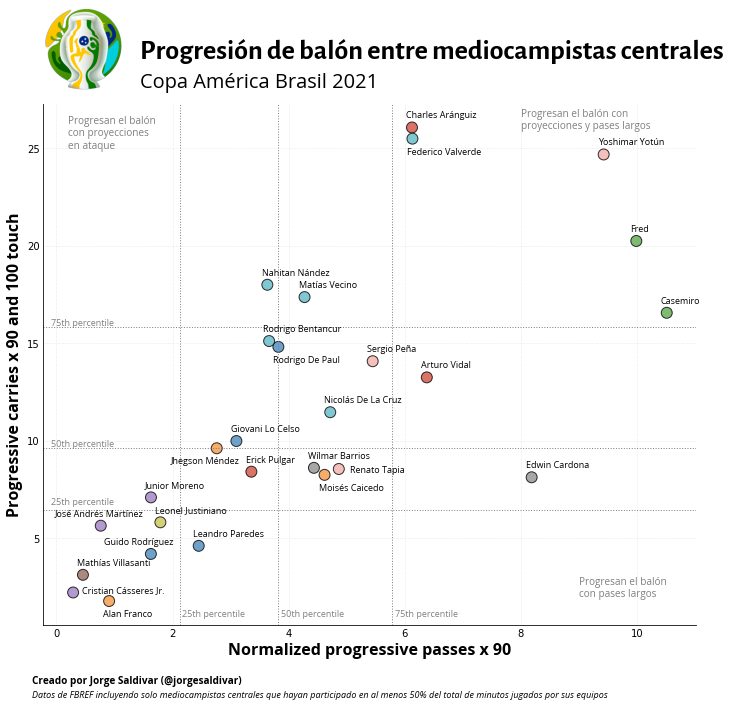

In [249]:
fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)

x = analysis_fdf['norm_cmp_pass'].values
y = analysis_fdf['norm_prog_carries'].values


ax.scatter(x, y, s=120, color=analysis_fdf['country'].map(colors), alpha=0.8, lw=1, zorder=2, edgecolor='black')
# add horizontal lines
ax.axhline(y=np.quantile(y, 0.25), color='gray', linestyle='dotted', lw=1)
ax.axhline(y=np.median(y), color='gray', linestyle='dotted', lw=1)
ax.axhline(y=np.quantile(y, 0.75), color='gray', linestyle='dotted', lw=1)
# add vertical lines
ax.axvline(x=np.quantile(x, 0.25), color='gray', linestyle='dotted', lw=1)
ax.axvline(x=np.median(x), color='gray', linestyle='dotted', lw=1)
ax.axvline(x=np.quantile(x, 0.75), color='gray', linestyle='dotted', lw=1)


fig.text(0.2,1.06,"Progresión de balón entre mediocampistas centrales",fontweight="bold", fontsize=28, fontfamily=title_font, 
         color=text_color)
fig.text(0.2,1.01,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, color=text_color)

ax.set_xlabel("Normalized progressive passes x 90", fontfamily=body_font, fontweight="bold", fontsize=16, 
              color=text_color)
ax.set_ylabel("Progressive carries x 90 and 100 touch", fontfamily=body_font, fontweight="bold", fontsize= 16, 
              color=text_color)

ax.tick_params(axis="both",length=0)


spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

# add percentiles annotations
ax.annotate('25th percentile', (-0.1, np.quantile(y,0.25)+0.3), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('50th percentile', (-0.1, np.quantile(y,0.50)+0.1), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('75th percentile', (-0.1, np.quantile(y,0.75)+0.1), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('25th percentile', (np.quantile(x,0.25)+0.05, 1), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('50th percentile', (np.quantile(x,0.50)+0.05, 1), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('75th percentile', (np.quantile(x,0.75)+0.05, 1), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)

# add players' names
for i, txt in enumerate(analysis_fdf['player']):
    delta_x = -0.1
    delta_y = 0.5
    # In some cases put the name below the dot
    if txt in ['Federico Valverde', 'Rodrigo De Paul', 'Alan Franco', 'Moisés Caicedo']:
        delta_y = -0.8
    if txt in ['Jhegson Méndez']:
        delta_y = -0.8
        delta_x = -0.8
    if txt in ['José Andrés Martínez', 'Guido Rodríguez']:
        delta_x = -0.8
    if txt in ['Renato Tapia']:
        delta_x = 0.2
        delta_y = -0.2
    if txt in ['Cristian Cásseres Jr.']:
        delta_x = 0.15
        delta_y = -0.01
    ax.annotate(txt, (x[i]+delta_x, y[i]+delta_y), fontfamily=body_font, fontweight="regular", fontsize=9, 
                color=text_color, zorder=3)

# add understanding info
ax.annotate('Progresan el balón con\nproyecciones y pases largos',(8, 26), fontfamily=body_font, 
            fontweight="regular", fontsize=10, color='gray', zorder=3)
ax.annotate('Progresan el balón\ncon proyecciones\nen ataque', (0.2, 25), fontfamily=body_font, fontweight="regular", 
            fontsize=10, color='gray', zorder=3)
ax.annotate('Progresan el balón\ncon pases largos', (9, 2), fontfamily=body_font, fontweight="regular", 
            fontsize=10, color='gray', zorder=3)

ax2 = fig.add_axes([0.02,1,0.20,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)
        
        
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.025, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF incluyendo solo mediocampistas centrales que hayan participado en al menos 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.05, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.savefig("outputs/progessive_ball_mf.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()

## 3. Press and progess among forwards

This analysis is inspired in [@NinadB_06](https://twitter.com/NinadB_06) who published the analysis [here](https://twitter.com/NinadB_06/status/1470465745880502285). It involves data about `progressive passes`, `progressive carries`, and `pressures`.

### Load data

In [19]:
# load defensive
defensive_df = pd.DataFrame()
for country in countries:
    if defensive_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_defensive_actions.csv")
        aux_df['country'] = country
        defensive_df = defensive_df.append(aux_df, ignore_index=True, sort=False)
    else:
        defensive_df = pd.read_csv(f"data/{country}_defensive_actions.csv")
        defensive_df['country'] = country        

In [20]:
# load possession
possession_df = pd.DataFrame()
for country in countries:
    if possession_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_possession.csv")
        aux_df['country'] = country
        possession_df = possession_df.append(aux_df, ignore_index=True, sort=False)
    else:
        possession_df = pd.read_csv(f"data/{country}_possession.csv")
        possession_df['country'] = country        

In [21]:
# load passing
passing_df = pd.DataFrame()
for country in countries:
    if passing_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_passing.csv")
        aux_df['country'] = country
        passing_df = passing_df.append(aux_df, ignore_index=True, sort=False)
    else:
        passing_df = pd.read_csv(f"data/{country}_passing.csv")
        passing_df['country'] = country        

In [22]:
# merge datasets
analysis_df = pd.merge(defensive_df, possession_df, how='inner', 
                       on=['player', 'pos', 'age', '90s', 'matches', 'country'])
analysis_df = pd.merge(analysis_df, passing_df, how='inner', 
                       on=['player', 'pos', 'age', '90s', 'matches', 'country'])

### Check data

In [23]:
print(f"The dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The dataset contains 253 rows and 75 columns


In [24]:
analysis_df.head()

,player,pos,age,90s,tackles_tkl,tackles_tklw,tackles_def 3rd,tackles_mid 3rd,tackles_att 3rd,vsdribbles_tkl,vsdribbles_att,vsdribbles_tkl%,vsdribbles_past,pressures_press,pressures_succ,pressures_%,pressures_def 3rd,pressures_mid 3rd,pressures_att 3rd,blocks_blocks,blocks_sh,blocks_shsv,blocks_pass,int,tkl+int,clr,err,matches,country,touches_touches,touches_def pen,touches_def 3rd,touches_mid 3rd,touches_att 3rd,touches_att pen,touches_live,dribbles_succ,dribbles_att,dribbles_succ%,dribbles_#pl,dribbles_megs,carries_carries,carries_totdist,carries_prgdist,carries_prog,carries_1/3,carries_cpa,carries_mis,carries_dis,receiving_targ,receiving_rec,receiving_rec%,receiving_prog,total_cmp,total_att,total_cmp%,total_totdist,total_prgdist,short_cmp,short_att,short_cmp%,medium_cmp,medium_att,medium_cmp%,long_cmp,long_att,long_cmp%,ast,xa,a-xa,kp,1/3,ppa,crspa,prog
0,Lionel Messi,"FW,MF",33.0,7.3,8,6,1,4,3,3,9,33.3,6,93,27,29.0,13,37,43,3,1,0,2,3,11,0,0,Matches,argentina,432,1,27,193,254,36,389,33,47,70.2,36,0,354,2085,1306,71,25,12,13,27,378,321,84.9,32,249,323,77.1,4417,1525,117,139,84.2,88,107,82.2,33,51,64.7,5,2.9,2.1,22,31,11,1,42
1,Emiliano Martínez,GK,28.0,6.3,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,Matches,argentina,171,156,171,0,0,0,122,0,0,NaN,0,0,92,477,290,0,0,0,0,0,68,68,100.0,0,111,163,68.1,3741,2449,15,15,100.0,54,55,98.2,41,91,45.1,0,0.0,0.0,0,5,0,0,0
2,Rodrigo De Paul,MF,26.0,5.5,11,10,7,2,2,5,8,62.5,3,87,30,34.5,37,29,21,8,0,0,8,8,19,5,0,Matches,argentina,305,3,75,140,119,7,281,3,10,30.0,5,0,224,1265,670,29,10,1,3,7,226,202,89.4,13,211,247,85.4,4157,999,87,100,87.0,83,93,89.2,34,44,77.3,1,0.8,0.2,8,18,5,0,22
3,Nicolás Otamendi,DF,32.0,5.3,9,5,7,2,0,4,7,57.1,3,49,20,40.8,32,17,0,9,2,0,7,5,14,34,1,Matches,argentina,258,43,144,130,6,3,242,0,0,NaN,0,0,150,1158,777,16,2,0,1,0,164,163,99.4,1,175,199,87.9,3621,1098,53,61,86.9,96,105,91.4,26,31,83.9,0,0.0,0.0,1,13,0,0,9
4,Lautaro Martínez,FW,23.0,4.9,5,3,1,2,2,3,6,50.0,3,88,15,17.0,3,41,44,5,1,0,4,5,10,5,0,Matches,argentina,129,7,18,54,61,20,123,8,9,88.9,9,1,76,185,85,3,0,1,10,11,135,75,55.6,19,41,57,71.9,555,22,25,27,92.6,12,19,63.2,2,6,33.3,0,0.0,0.0,1,2,0,0,0


### Filter data

**Remove players who play less than 50% of the team's played minutes**

In [25]:
min_teams_played = analysis_df.loc[analysis_df['player']=='Squad Total', ['country', '90s']]

In [26]:
analysis_fdf = pd.DataFrame()
for country in countries:
    team = analysis_df[analysis_df['country']==country]
    min_team_played = min_teams_played.loc[min_teams_played['country']==country, '90s'].values[0]
    if analysis_fdf.size > 0:
        analysis_fdf = analysis_fdf.append(team[team['90s'] >= (min_team_played/2)], ignore_index=True, 
                                           sort=False)
    else:
        analysis_fdf = team[team['90s'] >= (min_team_played/2)]

**Remove summary rows**

In [27]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Squad Total']
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Opponent Total']

In [28]:
print(f"There are {analysis_fdf.shape[0]} players who played more than 50% of their teams' minutes")

There are 106 players who played more than 50% of their teams' minutes


**Select midfielders**

In [29]:
forwards = ['Lionel Messi', 'Gilbert Álvarez', 'Neymar', 'Richarlison', 'Duván Zapata', 'Luis Fernando Díaz', 
            'Eduardo Vargas', 'Ben Brereton', 'Enner Valencia', 'Ángel Romero', 'Gabriel Ávalos', 
            'Gianluca Lapadula', 'Edinson Cavani', 'Luis Suárez', 'Fernando Aristeguieta']

In [30]:
analysis_fdf.loc[analysis_fdf['player'].isin(forwards), 'pos'] = 'RFW' 

In [31]:
analysis_fdf = analysis_fdf.loc[analysis_fdf['pos'] == 'RFW']

In [32]:
print(f'There are {analysis_fdf.shape[0]} central forwards')

There are 15 central forwards


**Select columns**

In [33]:
cols = ['player', 'pos', 'country', '90s', 'carries_prog', 'pressures_press', 'prog']

In [34]:
analysis_fdf = analysis_fdf[cols]

**Compute columns**

In [35]:
analysis_fdf['prog_actions'] = analysis_fdf['carries_prog'] + analysis_fdf['prog']

In [36]:
analysis_fdf['prog_actions/90'] = analysis_fdf['prog_actions'] / analysis_fdf['90s']

In [37]:
analysis_fdf['pressures_press/90'] = analysis_fdf['pressures_press'] / analysis_fdf['90s']

In [38]:
analysis_fdf.head()

,player,pos,country,90s,carries_prog,pressures_press,prog,prog_actions,prog_actions/90,pressures_press/90
0,Lionel Messi,RFW,argentina,7.3,71,93,42,113,15.479452,12.739726
22,Gilbert Álvarez,RFW,bolivia,2.4,3,62,2,5,2.083333,25.833333
27,Neymar,RFW,brazil,6.0,57,77,36,93,15.500000,12.833333
30,Richarlison,RFW,brazil,5.1,24,83,6,30,5.882353,16.274510
42,Duván Zapata,RFW,colombia,4.8,12,75,2,14,2.916667,15.625000


### Draw scatterplot

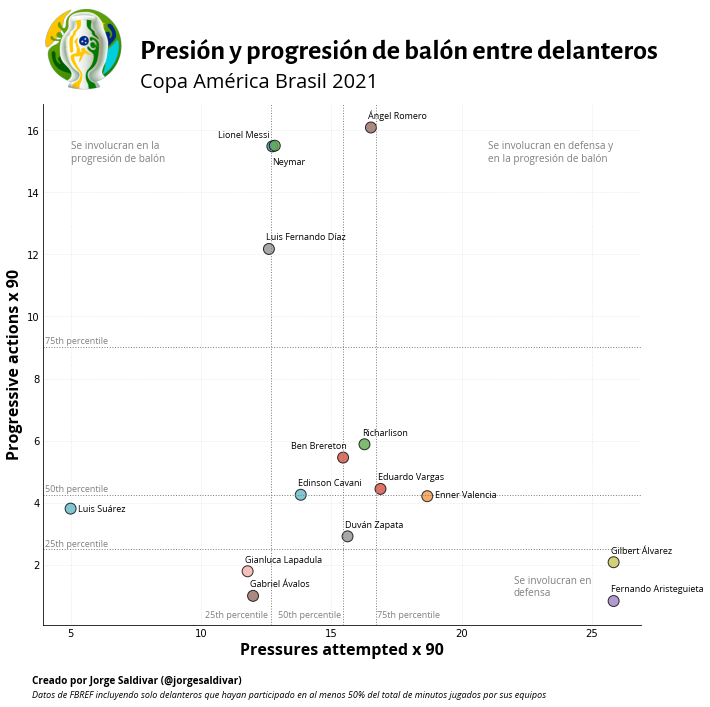

In [95]:
fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)

x = analysis_fdf['pressures_press/90'].values
y = analysis_fdf['prog_actions/90'].values


ax.scatter(x, y, s=120, color=analysis_fdf['country'].map(colors), alpha=0.8, lw=1, zorder=2, edgecolor='black')
# add horizontal lines
ax.axhline(y=np.quantile(y, 0.25), color='gray', linestyle='dotted', lw=1)
ax.axhline(y=np.median(y), color='gray', linestyle='dotted', lw=1)
ax.axhline(y=np.quantile(y, 0.75), color='gray', linestyle='dotted', lw=1)
# add vertical lines
ax.axvline(x=np.quantile(x, 0.25), color='gray', linestyle='dotted', lw=1)
ax.axvline(x=np.median(x), color='gray', linestyle='dotted', lw=1)
ax.axvline(x=np.quantile(x, 0.75), color='gray', linestyle='dotted', lw=1)


fig.text(0.2,1.06,"Presión y progresión de balón entre delanteros",fontweight="bold", fontsize=28, 
         fontfamily=title_font, color=text_color)
fig.text(0.2,1.01,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, 
         color=text_color)

ax.set_xlabel("Pressures attempted x 90", fontfamily=body_font, fontweight="bold", fontsize=16, 
              color=text_color)
ax.set_ylabel("Progressive actions x 90", fontfamily=body_font, fontweight="bold", fontsize= 16, 
              color=text_color)

ax.tick_params(axis="both",length=0)


spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

# add percentiles annotations
ax.annotate('25th percentile', (4, np.quantile(y,0.25)+0.1), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('50th percentile', (4, np.quantile(y,0.50)+0.1), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('75th percentile', (4, np.quantile(y,0.75)+0.1), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('25th percentile', (np.quantile(x,0.25)-2.5, 0.3), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('50th percentile', (np.quantile(x,0.50)-2.5, 0.3), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('75th percentile', (np.quantile(x,0.75)+0.05, 0.3), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)

# add players' names
for i, txt in enumerate(analysis_fdf['player']):
    delta_x = -0.1
    delta_y = 0.3
    # In some cases put the name below the dot
    if txt in ['Neymar']:
        delta_y = -0.6
    if txt in ['Lionel Messi']:
        delta_x = -2.1
    if txt in ['Luis Suárez']:
        delta_x = 0.3
        delta_y = -0.1
    if txt in ['Ben Brereton']:
        delta_x = -2
    if txt in ['Enner Valencia']:
        delta_x = 0.3
        delta_y = -0.05
    ax.annotate(txt, (x[i]+delta_x, y[i]+delta_y), fontfamily=body_font, fontweight="regular", fontsize=9, 
                color=text_color, zorder=3)

# add understanding info
ax.annotate('Se involucran en defensa y\nen la progresión de balón',(21, 15), fontfamily=body_font, 
            fontweight="regular", fontsize=10, color='gray', zorder=3)
ax.annotate('Se involucran en\ndefensa', (22, 1), fontfamily=body_font, fontweight="regular", 
            fontsize=10, color='gray', zorder=3)
ax.annotate('Se involucran en la\nprogresión de balón', (5, 15), fontfamily=body_font, fontweight="regular", 
            fontsize=10, color='gray', zorder=3)

ax2 = fig.add_axes([0.02,1,0.20,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)
        
        
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.025, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF incluyendo solo delanteros que hayan participado en al menos 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.05, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.savefig("outputs/press_progressive_fw.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()

## 4. Best shooters of the competition

This analysis is inspired in [@khatri_shreyas](https://twitter.com/khatri_shreyas) who published the analysis [here](https://twitter.com/khatri_shreyas/status/1470424436482342918). It involves data about `shoots` and `npXG`.

### Load data

In [98]:
shooting_df = pd.DataFrame()
for country in countries:
    if shooting_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_shooting.csv")
        aux_df['country'] = country
        shooting_df = shooting_df.append(aux_df, ignore_index=True, sort=False)
    else:
        shooting_df = pd.read_csv(f"data/{country}_shooting.csv")
        shooting_df['country'] = country     

### Check data

In [99]:
analysis_df = shooting_df
print(f"The dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The dataset contains 253 rows and 23 columns


In [100]:
analysis_df.head()

,player,pos,age,90s,standard_gls,standard_sh,standard_sot,standard_sot%,standard_sh/90,standard_sot/90,standard_g/sh,standard_g/sot,standard_dist,standard_fk,standard_pk,standard_pkatt,expected_xg,expected_npxg,expected_npxg/sh,expected_g-xg,expected_np:g-xg,matches,country
0,Lionel Messi,"FW,MF",33.0,7.3,4,25,9,36.0,3.41,1.23,0.12,0.33,21.7,8,1,1,2.8,2.0,0.08,1.2,1.0,Matches,argentina
1,Emiliano Martínez,GK,28.0,6.3,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches,argentina
2,Rodrigo De Paul,MF,26.0,5.5,1,4,2,50.0,0.72,0.36,0.25,0.50,14.0,0,0,0,1.0,1.0,0.24,0.0,0.0,Matches,argentina
3,Nicolás Otamendi,DF,32.0,5.3,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches,argentina
4,Lautaro Martínez,FW,23.0,4.9,3,15,6,40.0,3.03,1.21,0.20,0.50,12.0,0,0,0,4.5,4.5,0.31,-1.5,-1.5,Matches,argentina


### Filter data

**Remove players who play less than 50% of the team's played minutes**

In [101]:
min_teams_played = analysis_df.loc[analysis_df['player']=='Squad Total', ['country', '90s']]

In [102]:
analysis_fdf = pd.DataFrame()
for country in countries:
    team = analysis_df[analysis_df['country']==country]
    min_team_played = min_teams_played.loc[min_teams_played['country']==country, '90s'].values[0]
    if analysis_fdf.size > 0:
        analysis_fdf = analysis_fdf.append(team[team['90s'] >= (min_team_played/2)], ignore_index=True, 
                                           sort=False)
    else:
        analysis_fdf = team[team['90s'] >= (min_team_played/2)]

**Remove summary rows**

In [103]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Squad Total']
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Opponent Total']

In [104]:
print(f"There are {analysis_fdf.shape[0]} players who played more than 50% of their teams' minutes")

There are 106 players who played more than 50% of their teams' minutes


**Select midfielders and forwards**

In [105]:
forwards = ['Lionel Messi', 'Gilbert Álvarez', 'Neymar', 'Richarlison', 'Duván Zapata', 'Luis Fernando Díaz', 
            'Eduardo Vargas', 'Ben Brereton', 'Enner Valencia', 'Ángel Romero', 'Gabriel Ávalos', 
            'Gianluca Lapadula', 'Edinson Cavani', 'Luis Suárez', 'Fernando Aristeguieta']

In [106]:
midfielders = ['Rodrigo De Paul', 'Guido Rodríguez', 'Leandro Paredes', 'Giovani Lo Celso', 'Leonel Justiniano',
               'Fred', 'Casemiro', 'Wílmar Barrios', 'Edwin Cardona', 'Charles Aránguiz', 'Arturo Vidal',
               'Erick Pulgar', 'Jhegson Méndez', 'Moisés Caicedo', 'Alan Franco', 'Mathías Villasanti', 
               'Yoshimar Yotún', 'Renato Tapia', 'Sergio Peña', 'Federico Valverde', 'Matías Vecino', 
               'Nicolás De La Cruz', 'Nahitan Nández', 'Rodrigo Bentancur', 'Junior Moreno', 
               'Cristian Cásseres Jr.', 'José Andrés Martínez']

In [108]:
analysis_fdf.loc[analysis_fdf['player'].isin(midfielders+forwards), 'pos'] = 'MF_FW' 

In [109]:
analysis_fdf = analysis_fdf.loc[analysis_fdf['pos'] == 'MF_FW']

In [110]:
print(f'There are {analysis_fdf.shape[0]} midfielders and forwards')

There are 42 midfielders and forwards


**Select columns**

In [111]:
cols = ['player', 'pos', 'country', '90s', 'expected_npxg', 'expected_npxg/sh']

In [112]:
analysis_fdf = analysis_fdf[cols]

**Compute columns**

In [121]:
analysis_fdf['expected_npxg/sh'] = analysis_fdf['expected_npxg/sh'].fillna(0)

In [122]:
analysis_fdf['npxg/90'] = analysis_fdf['expected_npxg'] / analysis_fdf['90s']

In [123]:
analysis_fdf.head(10)

,player,pos,country,90s,expected_npxg,expected_npxg/sh,npxg/90
0,Lionel Messi,MF_FW,argentina,7.3,2.0,0.08,0.273973
2,Rodrigo De Paul,MF_FW,argentina,5.5,1.0,0.24,0.181818
5,Giovani Lo Celso,MF_FW,argentina,3.7,0.0,0.03,0.000000
6,Guido Rodríguez,MF_FW,argentina,4.7,0.1,0.04,0.021277
9,Leandro Paredes,MF_FW,argentina,3.9,0.0,0.01,0.000000
15,Leonel Justiniano,MF_FW,bolivia,3.8,0.0,0.00,0.000000
22,Gilbert Álvarez,MF_FW,bolivia,2.4,0.0,0.00,0.000000
27,Neymar,MF_FW,brazil,6.0,4.0,0.18,0.666667
28,Fred,MF_FW,brazil,5.1,0.1,0.03,0.019608
29,Casemiro,MF_FW,brazil,5.3,0.4,0.05,0.075472


### Draw scatterplot

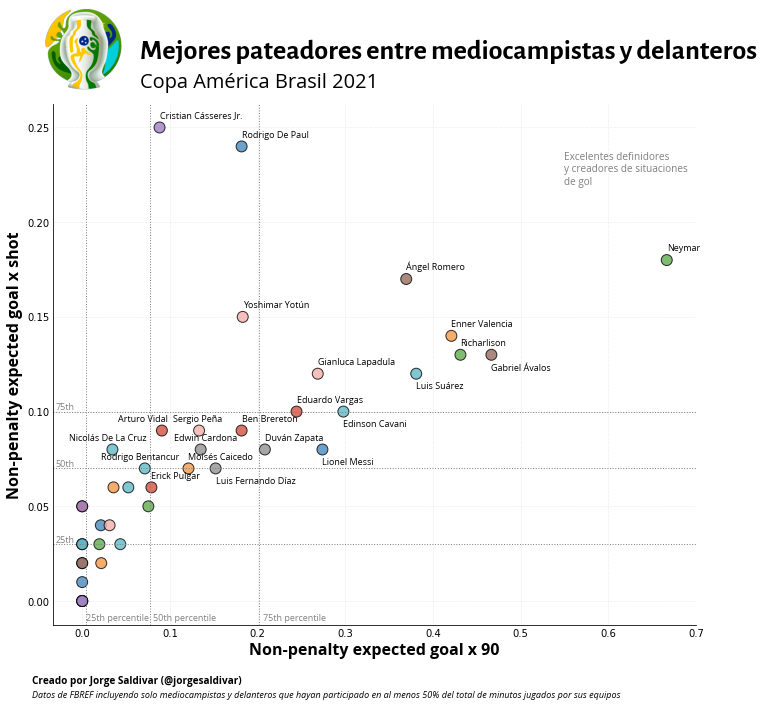

In [183]:
fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)

x = analysis_fdf['npxg/90'].values
y = analysis_fdf['expected_npxg/sh'].values


ax.scatter(x, y, s=120, color=analysis_fdf['country'].map(colors), alpha=0.8, lw=1, zorder=2, edgecolor='black')
# add horizontal lines
ax.axhline(y=np.quantile(y, 0.25), color='gray', linestyle='dotted', lw=1)
ax.axhline(y=np.median(y), color='gray', linestyle='dotted', lw=1)
ax.axhline(y=np.quantile(y, 0.75), color='gray', linestyle='dotted', lw=1)
# add vertical lines
ax.axvline(x=np.quantile(x, 0.25), color='gray', linestyle='dotted', lw=1)
ax.axvline(x=np.median(x), color='gray', linestyle='dotted', lw=1)
ax.axvline(x=np.quantile(x, 0.75), color='gray', linestyle='dotted', lw=1)


fig.text(0.2,1.06,"Mejores pateadores entre mediocampistas y delanteros",fontweight="bold", fontsize=28, 
         fontfamily=title_font, color=text_color)
fig.text(0.2,1.01,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, 
         color=text_color)

ax.set_xlabel("Non-penalty expected goal x 90", fontfamily=body_font, fontweight="bold", fontsize=16, 
              color=text_color)
ax.set_ylabel("Non-penalty expected goal x shot", fontfamily=body_font, fontweight="bold", fontsize= 16, 
              color=text_color)

ax.tick_params(axis="both",length=0)


spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

# add percentiles annotations
ax.annotate('25th', (-0.03, np.quantile(y,0.25)+0.001), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('50th', (-0.03, np.quantile(y,0.50)+0.001), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('75th', (-0.03, np.quantile(y,0.75)+0.001), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('25th percentile', (np.quantile(x,0.25), -0.01), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('50th percentile', (np.quantile(x,0.50)+0.004, -0.01), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('75th percentile', (np.quantile(x,0.75)+0.004, -0.01), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)

# add players' names
for i, txt in enumerate(analysis_fdf['player']):
    if x[i] < np.quantile(x, 0.50) and \
       y[i] < np.quantile(y, 0.50):
        continue
    delta_x = 0
    delta_y = 0.005
    # In some cases put the name below the dot
    if txt in ['Gabriel Ávalos', 'Luis Suárez', 'Lionel Messi', 'Edinson Cavani', 'Luis Fernando Díaz']:
        delta_y = -0.008
    if txt in ['Arturo Vidal', 'Nicolás De La Cruz', 'Rodrigo Bentancur']:
        delta_x = -0.05
    if txt in ['Sergio Peña', 'Edwin Cardona']:
        delta_x = -0.03
    ax.annotate(txt, (x[i]+delta_x, y[i]+delta_y), fontfamily=body_font, fontweight="regular", fontsize=9, 
                color=text_color, zorder=3)

# add understanding info
ax.annotate('Excelentes definidores\ny creadores de situaciones\nde gol',(0.55, 0.22), fontfamily=body_font, 
            fontweight="regular", fontsize=10, color='gray', zorder=3)

ax2 = fig.add_axes([0.02,1,0.20,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)
        
        
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.025, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF incluyendo solo mediocampistas y delanteros que hayan participado en al menos 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.05, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.savefig("outputs/best_shooters.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()

## 5. Duels and progressive actions

This analysis is inspired in [@HenshawAnalysis](https://twitter.com/HenshawAnalysis) who published the analysis [here](https://twitter.com/HenshawAnalysis/status/1470310079304024073). It involves data about `carries`, `progressive passes`, and `aerial duels`.

### Load data

In [207]:
# load passing
passing_df = pd.DataFrame()
for country in countries:
    if passing_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_passing.csv")
        aux_df['country'] = country
        passing_df = passing_df.append(aux_df, ignore_index=True, sort=False)
    else:
        passing_df = pd.read_csv(f"data/{country}_passing.csv")
        passing_df['country'] = country        

In [208]:
# load possession
possession_df = pd.DataFrame()
for country in countries:
    if possession_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_possession.csv")
        aux_df['country'] = country
        possession_df = possession_df.append(aux_df, ignore_index=True, sort=False)
    else:
        possession_df = pd.read_csv(f"data/{country}_possession.csv")
        possession_df['country'] = country        

In [209]:
# load misc
misc_df = pd.DataFrame()
for country in countries:
    if misc_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_misc.csv")
        aux_df['country'] = country
        misc_df = misc_df.append(aux_df, ignore_index=True, sort=False)
    else:
        misc_df = pd.read_csv(f"data/{country}_misc.csv")
        misc_df['country'] = country        

In [212]:
# load defensive
defensive_df = pd.DataFrame()
for country in countries:
    if defensive_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_defensive_actions.csv")
        aux_df['country'] = country
        defensive_df = defensive_df.append(aux_df, ignore_index=True, sort=False)
    else:
        defensive_df = pd.read_csv(f"data/{country}_defensive_actions.csv")
        defensive_df['country'] = country        

In [213]:
# merge datasets
analysis_df = pd.merge(passing_df, possession_df, how='inner', 
                       on=['player', 'pos', 'age', '90s', 'matches', 'country'])
analysis_df = pd.merge(analysis_df, misc_df, how='inner', 
                       on=['player', 'pos', 'age', '90s', 'matches', 'country'])
analysis_df = pd.merge(analysis_df, defensive_df, how='inner', 
                       on=['player', 'pos', 'age', '90s', 'matches', 'country'])

### Check data

In [214]:
print(f"The dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The dataset contains 253 rows and 91 columns


In [215]:
analysis_df.head()

,player,pos,age,90s,total_cmp,total_att,total_cmp%,total_totdist,total_prgdist,short_cmp,short_att,short_cmp%,medium_cmp,medium_att,medium_cmp%,long_cmp,long_att,long_cmp%,ast,xa,a-xa,kp,1/3,ppa,crspa,prog,matches,country,touches_touches,touches_def pen,touches_def 3rd,touches_mid 3rd,touches_att 3rd,touches_att pen,touches_live,dribbles_succ,dribbles_att,dribbles_succ%,dribbles_#pl,dribbles_megs,carries_carries,carries_totdist,carries_prgdist,carries_prog,carries_1/3,carries_cpa,carries_mis,carries_dis,receiving_targ,receiving_rec,receiving_rec%,receiving_prog,performance_crdy,performance_crdr,performance_2crdy,performance_fls,performance_fld,performance_off,performance_crs,performance_int,performance_tklw,performance_pkwon,performance_pkcon,performance_og,performance_recov,aerialduels_won,aerialduels_lost,aerialduels_won%,tackles_tkl,tackles_tklw,tackles_def 3rd,tackles_mid 3rd,tackles_att 3rd,vsdribbles_tkl,vsdribbles_att,vsdribbles_tkl%,vsdribbles_past,pressures_press,pressures_succ,pressures_%,pressures_def 3rd,pressures_mid 3rd,pressures_att 3rd,blocks_blocks,blocks_sh,blocks_shsv,blocks_pass,int,tkl+int,clr,err
0,Lionel Messi,"FW,MF",33.0,7.3,249,323,77.1,4417,1525,117,139,84.2,88,107,82.2,33,51,64.7,5,2.9,2.1,22,31,11,1,42,Matches,argentina,432,1,27,193,254,36,389,33,47,70.2,36,0,354,2085,1306,71,25,12,13,27,378,321,84.9,32,0,0,0,4,29,3,19,3,6,0,0,0,46,1,8,11.1,8,6,1,4,3,3,9,33.3,6,93,27,29.0,13,37,43,3,1,0,2,3,11,0,0
1,Emiliano Martínez,GK,28.0,6.3,111,163,68.1,3741,2449,15,15,100.0,54,55,98.2,41,91,45.1,0,0.0,0.0,0,5,0,0,0,Matches,argentina,171,156,171,0,0,0,122,0,0,NaN,0,0,92,477,290,0,0,0,0,0,68,68,100.0,0,1,0,0,0,2,0,0,0,0,0,0,0,24,0,0,NaN,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0
2,Rodrigo De Paul,MF,26.0,5.5,211,247,85.4,4157,999,87,100,87.0,83,93,89.2,34,44,77.3,1,0.8,0.2,8,18,5,0,22,Matches,argentina,305,3,75,140,119,7,281,3,10,30.0,5,0,224,1265,670,29,10,1,3,7,226,202,89.4,13,1,0,0,11,17,0,4,8,10,0,0,0,42,1,2,33.3,11,10,7,2,2,5,8,62.5,3,87,30,34.5,37,29,21,8,0,0,8,8,19,5,0
3,Nicolás Otamendi,DF,32.0,5.3,175,199,87.9,3621,1098,53,61,86.9,96,105,91.4,26,31,83.9,0,0.0,0.0,1,13,0,0,9,Matches,argentina,258,43,144,130,6,3,242,0,0,NaN,0,0,150,1158,777,16,2,0,1,0,164,163,99.4,1,2,0,0,8,7,0,0,5,5,0,0,0,22,19,5,79.2,9,5,7,2,0,4,7,57.1,3,49,20,40.8,32,17,0,9,2,0,7,5,14,34,1
4,Lautaro Martínez,FW,23.0,4.9,41,57,71.9,555,22,25,27,92.6,12,19,63.2,2,6,33.3,0,0.0,0.0,1,2,0,0,0,Matches,argentina,129,7,18,54,61,20,123,8,9,88.9,9,1,76,185,85,3,0,1,10,11,135,75,55.6,19,1,0,0,13,8,1,1,5,3,0,0,0,18,7,11,38.9,5,3,1,2,2,3,6,50.0,3,88,15,17.0,3,41,44,5,1,0,4,5,10,5,0


### Filter data

**Remove players who play less than 50% of the team's played minutes**

In [216]:
min_teams_played = analysis_df.loc[analysis_df['player']=='Squad Total', ['country', '90s']]

In [226]:
analysis_fdf = pd.DataFrame()
for country in countries:
    team = analysis_df[analysis_df['country']==country]
    min_team_played = min_teams_played.loc[min_teams_played['country']==country, '90s'].values[0]
    if analysis_fdf.size > 0:
        analysis_fdf = analysis_fdf.append(team[team['90s'] >= (min_team_played/2)], ignore_index=True, 
                                           sort=False)
    else:
        analysis_fdf = team[team['90s'] >= (min_team_played/2)]

**Remove summary rows**

In [227]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Squad Total']
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Opponent Total']

In [228]:
print(f"There are {analysis_fdf.shape[0]} players who played more than 50% of their teams' minutes")

There are 106 players who played more than 50% of their teams' minutes


**Select centerbacks**

In [232]:
centerbacks = ['Nicolás Otamendi', 'Germán Pezzella', 'Adrian Jusino', 'Jairo Quinteros', 'Marquinhos', 'Thiago Silva',
               'Yerry Mina', 'William Tesillo', 'Davinson Sánchez', 'Gary Medel', 'Francisco Sierralta', 
               'Robert Arboleda', 'Piero Hincapié', 'Júnior Alonso', 'Christian Ramos', 'Alexander Callens',
               'José María Giménez', 'Diego Godín', 'Adrián Martínez', 'Francisco La Mantía', 'Gustavo Gómez']

In [233]:
analysis_fdf.loc[analysis_fdf['player'].isin(centerbacks), 'pos'] = 'CB' 

In [234]:
analysis_fdf = analysis_fdf.loc[analysis_fdf['pos'] == 'CB']

In [235]:
print(f'There are {analysis_fdf.shape[0]} centerbacks')

There are 21 centerbacks


**Select columns**

In [236]:
cols = ['player', 'pos', 'country', '90s', 'prog', 'carries_carries', 'aerialduels_won', 'aerialduels_lost', 
        'tackles_tkl', 'tackles_tklw']

In [237]:
analysis_fdf = analysis_fdf[cols]

In [238]:
analysis_fdf['progressive_actions'] = analysis_fdf['prog'] + analysis_fdf['carries_carries']

In [239]:
analysis_fdf['prog_actions/90'] = analysis_fdf['progressive_actions'] / analysis_fdf['90s']

In [240]:
analysis_fdf['total_defensive_duels'] = analysis_fdf['aerialduels_won'] + analysis_fdf['aerialduels_lost'] + \
    analysis_fdf['tackles_tkl']

In [243]:
analysis_fdf['per_defensive_duels_won'] = 100 * ((analysis_fdf['aerialduels_won'] + analysis_fdf['tackles_tklw']) / \
    analysis_fdf['total_defensive_duels'])

In [244]:
analysis_fdf.head()

,player,pos,country,90s,prog,carries_carries,aerialduels_won,aerialduels_lost,tackles_tkl,tackles_tklw,progressive_actions,prog_actions/90,total_defensive_duels,per_defensive_duels_won
3,Nicolás Otamendi,CB,argentina,5.3,9,150,19,5,9,5,159,30.000000,33,72.727273
7,Germán Pezzella,CB,argentina,4.5,9,141,14,3,1,0,150,33.333333,18,77.777778
14,Adrian Jusino,CB,bolivia,4.0,0,78,6,7,3,3,78,19.500000,16,56.250000
20,Jairo Quinteros,CB,bolivia,3.0,4,72,2,1,3,2,76,25.333333,6,66.666667
26,Marquinhos,CB,brazil,6.0,21,296,11,8,4,4,317,52.833333,23,65.217391


### Draw scatterplot

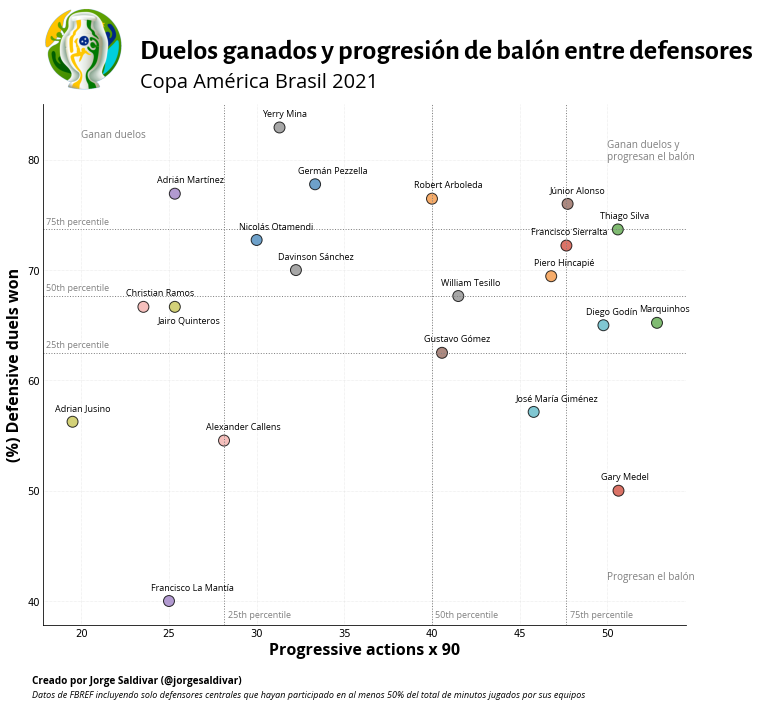

In [272]:
fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)

x = analysis_fdf['prog_actions/90'].values
y = analysis_fdf['per_defensive_duels_won'].values


ax.scatter(x, y, s=120, color=analysis_fdf['country'].map(colors), alpha=0.8, lw=1, zorder=2, edgecolor='black')
# add horizontal lines
ax.axhline(y=np.quantile(y, 0.25), color='gray', linestyle='dotted', lw=1)
ax.axhline(y=np.median(y), color='gray', linestyle='dotted', lw=1)
ax.axhline(y=np.quantile(y, 0.75), color='gray', linestyle='dotted', lw=1)
# add vertical lines
ax.axvline(x=np.quantile(x, 0.25), color='gray', linestyle='dotted', lw=1)
ax.axvline(x=np.median(x), color='gray', linestyle='dotted', lw=1)
ax.axvline(x=np.quantile(x, 0.75), color='gray', linestyle='dotted', lw=1)


fig.text(0.2,1.06,"Duelos ganados y progresión de balón entre defensores",fontweight="bold", fontsize=28, 
         fontfamily=title_font, color=text_color)
fig.text(0.2,1.01,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, 
         color=text_color)

ax.set_xlabel("Progressive actions x 90", fontfamily=body_font, fontweight="bold", fontsize=16, 
              color=text_color)
ax.set_ylabel("(%) Defensive duels won", fontfamily=body_font, fontweight="bold", fontsize= 16, 
              color=text_color)

ax.tick_params(axis="both",length=0)


spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

# add percentiles annotations
ax.annotate('25th percentile', (18, np.quantile(y,0.25)+0.5), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('50th percentile', (18, np.quantile(y,0.50)+0.5), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('75th percentile', (18, np.quantile(y,0.75)+0.5), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('25th percentile', (np.quantile(x,0.25)+0.2, 38.5), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('50th percentile', (np.quantile(x,0.50)+0.2, 38.5), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('75th percentile', (np.quantile(x,0.75)+0.2, 38.5), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)

# add players' names
for i, txt in enumerate(analysis_fdf['player']):
    delta_x = -1
    delta_y = 1
    if txt in ['Francisco Sierralta']:
        delta_x = -2
    if txt in ['Jairo Quinteros']:
        delta_y = -1.5
    ax.annotate(txt, (x[i]+delta_x, y[i]+delta_y), fontfamily=body_font, fontweight="regular", fontsize=9, 
                color=text_color, zorder=3)

# add understanding info
ax.annotate('Ganan duelos y\nprogresan el balón',(50, 80), fontfamily=body_font, 
            fontweight="regular", fontsize=10, color='gray', zorder=3)
ax.annotate('Ganan duelos',(20, 82), fontfamily=body_font, 
            fontweight="regular", fontsize=10, color='gray', zorder=3)
ax.annotate('Progresan el balón',(50, 42), fontfamily=body_font, 
            fontweight="regular", fontsize=10, color='gray', zorder=3)

ax2 = fig.add_axes([0.02,1,0.20,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)
        
        
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.025, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF incluyendo solo defensores centrales que hayan participado en al menos 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.05, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.savefig("outputs/duels_ball_progression_df.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()

## 6. Offensive corners

This analysis is inspired in [@Odriozolite](https://twitter.com/Odriozolite) who published the analysis [here](https://twitter.com/Odriozolite/status/1469299881135120384). It involves data about `corner kicks`.

### Load data

In [561]:
# load pass types
pass_types_df = pd.DataFrame()
for country in countries:
    if pass_types_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_pass_types.csv")
        aux_df['country'] = country
        pass_types_df = pass_types_df.append(aux_df, ignore_index=True, sort=False)
    else:
        pass_types_df = pd.read_csv(f"data/{country}_pass_types.csv")
        pass_types_df['country'] = country        

In [562]:
# merge datasets
analysis_df = pass_types_df

### Check data

In [563]:
print(f"The dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The dataset contains 253 rows and 31 columns


In [564]:
analysis_df.head()

,player,pos,age,90s,att,passtypes_live,passtypes_dead,passtypes_fk,passtypes_tb,passtypes_press,passtypes_sw,passtypes_crs,passtypes_ck,cornerkicks_in,cornerkicks_out,cornerkicks_str,height_ground,height_low,height_high,bodyparts_left,bodyparts_right,bodyparts_head,bodyparts_ti,bodyparts_other,outcomes_cmp,outcomes_off,outcomes_out,outcomes_int,outcomes_blocks,matches,country
0,Lionel Messi,"FW,MF",33.0,7.3,323,278,45,26,4,68,14,19,17,3,7,1,228,38,57,284,34,3,0,1,249,0,4,11,15,Matches,argentina
1,Emiliano Martínez,GK,28.0,6.3,163,110,53,17,0,9,4,0,0,0,0,0,66,10,87,19,108,0,0,27,111,0,6,3,1,Matches,argentina
2,Rodrigo De Paul,MF,26.0,5.5,247,218,29,13,3,34,13,4,13,2,0,0,192,22,33,4,233,4,3,2,211,1,4,3,3,Matches,argentina
3,Nicolás Otamendi,DF,32.0,5.3,199,183,16,16,0,16,4,0,0,0,0,0,164,14,21,31,155,6,0,0,175,0,2,2,4,Matches,argentina
4,Lautaro Martínez,FW,23.0,4.9,57,51,6,0,0,20,0,1,0,0,0,0,38,11,8,4,44,2,0,2,41,0,0,4,3,Matches,argentina


### Select data

**Select columns**

In [565]:
analysis_fdf = analysis_df.loc[analysis_df['player']=='Squad Total', ['country', 'cornerkicks_in', 'cornerkicks_out', 
                                                                      'cornerkicks_str']]

In [566]:
analysis_fdf.head(10)

,country,cornerkicks_in,cornerkicks_out,cornerkicks_str
26,argentina,5,8,1
52,bolivia,7,2,0
77,brazil,13,13,1
103,colombia,8,11,5
127,chile,1,7,3
151,ecuador,8,29,1
176,paraguay,3,10,4
201,peru,2,16,0
224,uruguay,11,7,3
251,venezuela,8,7,0


### Compute columns

In [567]:
analysis_fdf['total_corners'] = analysis_fdf.loc[:,['cornerkicks_in', 'cornerkicks_out', 'cornerkicks_str']].sum(axis=1)

In [568]:
analysis_fdf['per_corner_in'] = round(100 * (analysis_fdf['cornerkicks_in'] / analysis_fdf['total_corners']),2)

In [569]:
analysis_fdf['per_corner_out'] = round(100 * (analysis_fdf['cornerkicks_out'] / analysis_fdf['total_corners']),2)

In [570]:
analysis_fdf['per_corner_str'] = round(100 * (analysis_fdf['cornerkicks_str'] / analysis_fdf['total_corners']),2)

In [571]:
analysis_fdf['gls_from_corner'] = [0,0,2,0,0,0,3,3,1,0]

In [572]:
analysis_fdf.head(10)

,country,cornerkicks_in,cornerkicks_out,cornerkicks_str,total_corners,per_corner_in,per_corner_out,per_corner_str,gls_from_corner
26,argentina,5,8,1,14,35.71,57.14,7.14,0
52,bolivia,7,2,0,9,77.78,22.22,0.00,0
77,brazil,13,13,1,27,48.15,48.15,3.70,2
103,colombia,8,11,5,24,33.33,45.83,20.83,0
127,chile,1,7,3,11,9.09,63.64,27.27,0
151,ecuador,8,29,1,38,21.05,76.32,2.63,0
176,paraguay,3,10,4,17,17.65,58.82,23.53,3
201,peru,2,16,0,18,11.11,88.89,0.00,3
224,uruguay,11,7,3,21,52.38,33.33,14.29,1
251,venezuela,8,7,0,15,53.33,46.67,0.00,0


### Draw plot

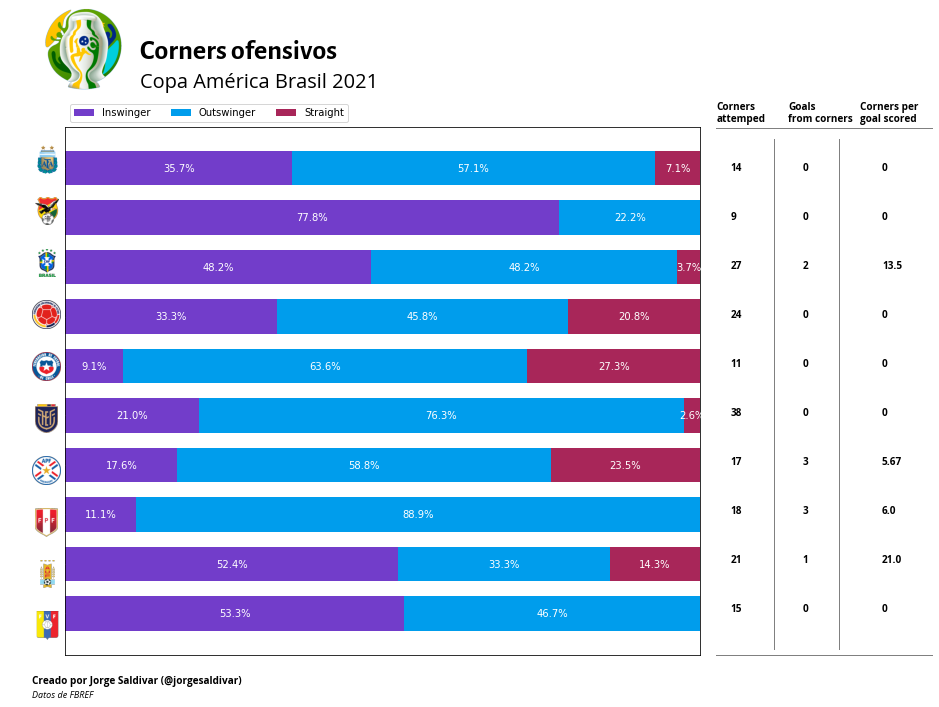

In [574]:
fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)
categories = ['Inswinger', 'Outswinger', 'Straight']
labels = list(analysis_fdf.country.values)
data = np.array(analysis_fdf.loc[:,['per_corner_in', 'per_corner_out', 'per_corner_str']])
data_cum = data.cumsum(axis=1)
category_colors = ['#723DCA', '#009DEC', '#A82659']


fig.text(0.2,1.06,"Corners ofensivos",fontweight="bold", fontsize=28, fontfamily=title_font, color=text_color)
fig.text(0.2,1.01,"Copa América Brasil 2021",fontweight="regular", fontsize=20, fontfamily=body_font, color=text_color)

ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())


for i, (colname, color) in enumerate(zip(categories, category_colors)):
    widths = data[:, i]
    labels_bar = []
    for w in widths:
        if w > 0.:
            labels_bar.append(f'{round(w,1)}%')
        else:
            labels_bar.append('')
    starts = data_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.7, label=colname, color=color)
    ax.bar_label(rects, labels=labels_bar, label_type='center', color='white')

ax.tick_params(axis='y', colors='white') ## put labels in white
ax.legend(ncol=len(categories), bbox_to_anchor=(0, 1), loc='lower left', fontsize='medium')

y_logo = 0.95
for country in countries:
    y_logo -=  0.09
    ax2 = fig.add_axes([0.02,y_logo,0.10,0.05])
    ax2.axis("off")
    img = Image.open(f"imgs/logos/{country}.png")
    ax2.imshow(img)

ax2 = fig.add_axes([0.02,1,0.2,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)

s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.025, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF"
fig.text(0.05, -0.05, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

# Add side numbers
s = "Corners\nattemped"
fig.text(1, 0.95, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Goals\nfrom corners"
fig.text(1.1, 0.95, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Corners per\ngoal scored"
fig.text(1.2, 0.95, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)

# Add lines
fig.add_artist(lines.Line2D([1, 1.3], [0.94, 0.94], color='gray', linewidth=1))
fig.add_artist(lines.Line2D([1, 1.3], [0.025, 0.025], color='gray', linewidth=1))

fig.add_artist(lines.Line2D([1.08, 1.08], [0.92, 0.035], color='gray', linewidth=1))
fig.add_artist(lines.Line2D([1.17, 1.17], [0.92, 0.035], color='gray', linewidth=1))

y_txt = 0.95
for country in countries:
    y_txt -=  0.085
    gls = analysis_fdf.loc[analysis_fdf['country']==country, 'gls_from_corner'].values[0]
    corners = analysis_fdf.loc[analysis_fdf['country']==country, 'total_corners'].values[0]
    ration_gc = round(corners/gls,2) if gls != 0 else 0
    fig.text(1.02, y_txt, corners, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
    fig.text(1.12, y_txt, gls, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
    fig.text(1.23, y_txt, ration_gc, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)

plt.savefig("outputs/offensive_corners.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()

## 6. Defensive corners

This analysis is inspired in [@Odriozolite](https://twitter.com/Odriozolite) who published the analysis [here](https://twitter.com/Odriozolite/status/1469617804424859648). It involves data about `corner kicks`.

### Load data

In [575]:
# load pass types
pass_types_df = pd.DataFrame()
for country in countries:
    if pass_types_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_pass_types.csv")
        aux_df['country'] = country
        pass_types_df = pass_types_df.append(aux_df, ignore_index=True, sort=False)
    else:
        pass_types_df = pd.read_csv(f"data/{country}_pass_types.csv")
        pass_types_df['country'] = country        

In [576]:
# merge datasets
analysis_df = pass_types_df

### Check data

In [577]:
print(f"The dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The dataset contains 253 rows and 31 columns


In [578]:
analysis_df.head()

,player,pos,age,90s,att,passtypes_live,passtypes_dead,passtypes_fk,passtypes_tb,passtypes_press,passtypes_sw,passtypes_crs,passtypes_ck,cornerkicks_in,cornerkicks_out,cornerkicks_str,height_ground,height_low,height_high,bodyparts_left,bodyparts_right,bodyparts_head,bodyparts_ti,bodyparts_other,outcomes_cmp,outcomes_off,outcomes_out,outcomes_int,outcomes_blocks,matches,country
0,Lionel Messi,"FW,MF",33.0,7.3,323,278,45,26,4,68,14,19,17,3,7,1,228,38,57,284,34,3,0,1,249,0,4,11,15,Matches,argentina
1,Emiliano Martínez,GK,28.0,6.3,163,110,53,17,0,9,4,0,0,0,0,0,66,10,87,19,108,0,0,27,111,0,6,3,1,Matches,argentina
2,Rodrigo De Paul,MF,26.0,5.5,247,218,29,13,3,34,13,4,13,2,0,0,192,22,33,4,233,4,3,2,211,1,4,3,3,Matches,argentina
3,Nicolás Otamendi,DF,32.0,5.3,199,183,16,16,0,16,4,0,0,0,0,0,164,14,21,31,155,6,0,0,175,0,2,2,4,Matches,argentina
4,Lautaro Martínez,FW,23.0,4.9,57,51,6,0,0,20,0,1,0,0,0,0,38,11,8,4,44,2,0,2,41,0,0,4,3,Matches,argentina


### Select data

**Select columns**

In [579]:
analysis_fdf = analysis_df.loc[analysis_df['player']=='Opponent Total', ['country', 'cornerkicks_in', 
                                                                         'cornerkicks_out', 'cornerkicks_str']]

In [580]:
analysis_fdf.head(10)

,country,cornerkicks_in,cornerkicks_out,cornerkicks_str
27,argentina,7,17,0
53,bolivia,3,7,3
78,brazil,4,14,1
104,colombia,14,12,3
128,chile,10,8,2
152,ecuador,4,6,0
177,paraguay,4,6,0
202,peru,7,26,4
225,uruguay,4,3,4
252,venezuela,9,11,1


### Compute columns

In [581]:
analysis_fdf['total_corners'] = analysis_fdf.loc[:,['cornerkicks_in', 'cornerkicks_out', 'cornerkicks_str']].sum(axis=1)

In [582]:
analysis_fdf['per_corner_in'] = round(100 * (analysis_fdf['cornerkicks_in'] / analysis_fdf['total_corners']),2)

In [583]:
analysis_fdf['per_corner_out'] = round(100 * (analysis_fdf['cornerkicks_out'] / analysis_fdf['total_corners']),2)

In [584]:
analysis_fdf['per_corner_str'] = round(100 * (analysis_fdf['cornerkicks_str'] / analysis_fdf['total_corners']),2)

In [585]:
analysis_fdf['gls_from_corner'] = [0,0,0,3,2,0,0,2,0,2]

In [586]:
analysis_fdf['corners_by_gls'] = analysis_fdf['total_corners'] / analysis_fdf['gls_from_corner']

In [587]:
analysis_fdf.loc[analysis_fdf['corners_by_gls']==np.inf,'corners_by_gls'] = 0

In [588]:
analysis_fdf = analysis_fdf.sort_values('corners_by_gls')

In [589]:
analysis_fdf.head(10)

,country,cornerkicks_in,cornerkicks_out,cornerkicks_str,total_corners,per_corner_in,per_corner_out,per_corner_str,gls_from_corner,corners_by_gls
27,argentina,7,17,0,24,29.17,70.83,0.00,0,0.000000
53,bolivia,3,7,3,13,23.08,53.85,23.08,0,0.000000
78,brazil,4,14,1,19,21.05,73.68,5.26,0,0.000000
152,ecuador,4,6,0,10,40.00,60.00,0.00,0,0.000000
177,paraguay,4,6,0,10,40.00,60.00,0.00,0,0.000000
225,uruguay,4,3,4,11,36.36,27.27,36.36,0,0.000000
104,colombia,14,12,3,29,48.28,41.38,10.34,3,9.666667
128,chile,10,8,2,20,50.00,40.00,10.00,2,10.000000
252,venezuela,9,11,1,21,42.86,52.38,4.76,2,10.500000
202,peru,7,26,4,37,18.92,70.27,10.81,2,18.500000


### Draw plot

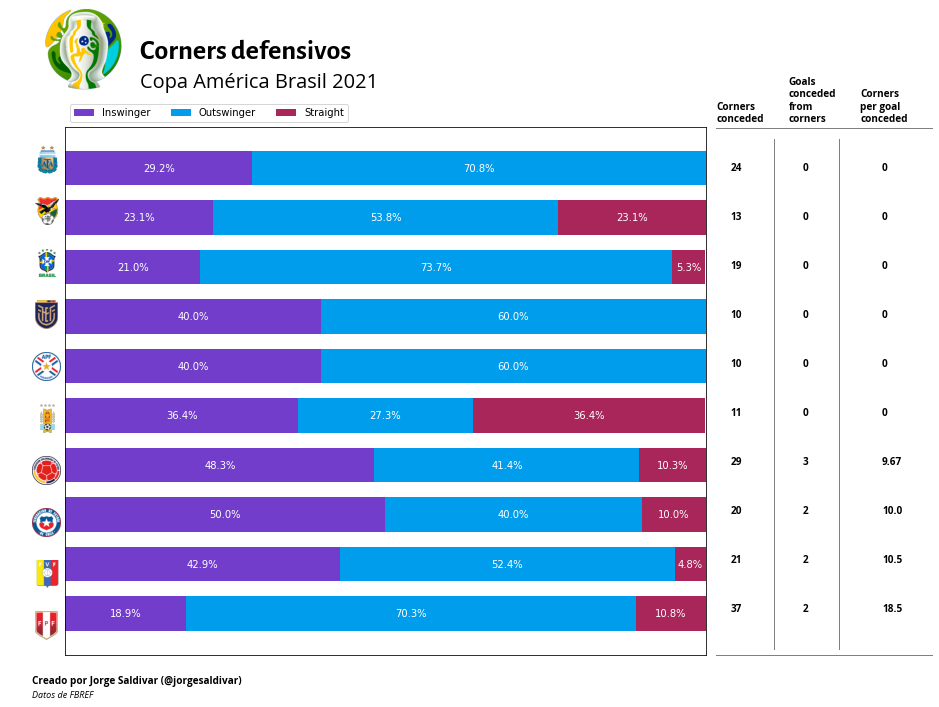

In [590]:
fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)
categories = ['Inswinger', 'Outswinger', 'Straight']
labels = list(analysis_fdf.country.values)
data = np.array(analysis_fdf.loc[:,['per_corner_in', 'per_corner_out', 'per_corner_str']])
data_cum = data.cumsum(axis=1)
category_colors = ['#723DCA', '#009DEC', '#A82659']


fig.text(0.2,1.06,"Corners defensivos",fontweight="bold", fontsize=28, fontfamily=title_font, color=text_color)
fig.text(0.2,1.01,"Copa América Brasil 2021",fontweight="regular", fontsize=20, fontfamily=body_font, color=text_color)

ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())


for i, (colname, color) in enumerate(zip(categories, category_colors)):
    widths = data[:, i]
    labels_bar = []
    for w in widths:
        if w > 0.:
            labels_bar.append(f'{round(w,1)}%')
        else:
            labels_bar.append('')
    starts = data_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.7, label=colname, color=color)
    ax.bar_label(rects, labels=labels_bar, label_type='center', color='white')

ax.tick_params(axis='y', colors='white') ## put labels in white
ax.legend(ncol=len(categories), bbox_to_anchor=(0, 1), loc='lower left', fontsize='medium')

y_logo = 0.95
for country in analysis_fdf.country.values:
    y_logo -=  0.09
    ax2 = fig.add_axes([0.02,y_logo,0.10,0.05])
    ax2.axis("off")
    img = Image.open(f"imgs/logos/{country}.png")
    ax2.imshow(img)

ax2 = fig.add_axes([0.02,1,0.2,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)

s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.025, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF"
fig.text(0.05, -0.05, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

# Add side numbers
s = "Corners\nconceded"
fig.text(1, 0.95, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Goals\nconceded\nfrom\ncorners"
fig.text(1.1, 0.95, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Corners\nper goal\nconceded"
fig.text(1.2, 0.95, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)

# Add lines
fig.add_artist(lines.Line2D([1, 1.3], [0.94, 0.94], color='gray', linewidth=1))
fig.add_artist(lines.Line2D([1, 1.3], [0.025, 0.025], color='gray', linewidth=1))

fig.add_artist(lines.Line2D([1.08, 1.08], [0.92, 0.035], color='gray', linewidth=1))
fig.add_artist(lines.Line2D([1.17, 1.17], [0.92, 0.035], color='gray', linewidth=1))

y_txt = 0.95
for country in analysis_fdf.country.values:
    y_txt -=  0.085
    gls = analysis_fdf.loc[analysis_fdf['country']==country, 'gls_from_corner'].values[0]
    corners = analysis_fdf.loc[analysis_fdf['country']==country, 'total_corners'].values[0]
    ration_gc = round(corners/gls,2) if gls != 0 else 0
    fig.text(1.02, y_txt, corners, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
    fig.text(1.12, y_txt, gls, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
    fig.text(1.23, y_txt, ration_gc, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)

plt.savefig("outputs/defensive_corners.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()

## 7. Defensive intensity vs. effectiveness

This analysis is inspired in [@exceedingxpuns](https://twitter.com/exceedingxpuns) who published the analysis [here](https://twitter.com/exceedingxpuns/status/1468927660298358787). It involves data about `passes`, `pressure`, and `xG`.

### Load data

In [607]:
# load passing
passing_df = pd.DataFrame()
for country in countries:
    if passing_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_passing.csv")
        aux_df['country'] = country
        passing_df = passing_df.append(aux_df, ignore_index=True, sort=False)
    else:
        passing_df = pd.read_csv(f"data/{country}_passing.csv")
        passing_df['country'] = country        

In [608]:
# load defensive actions
defensive_df = pd.DataFrame()
for country in countries:
    if defensive_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_defensive_actions.csv")
        aux_df['country'] = country
        defensive_df = defensive_df.append(aux_df, ignore_index=True, sort=False)
    else:
        defensive_df = pd.read_csv(f"data/{country}_defensive_actions.csv")
        defensive_df['country'] = country        

In [609]:
# load standard
standard_df = pd.DataFrame()
for country in countries:
    if standard_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_standard.csv")
        aux_df['country'] = country
        standard_df = standard_df.append(aux_df, ignore_index=True, sort=False)
    else:
        standard_df = pd.read_csv(f"data/{country}_standard.csv")
        standard_df['country'] = country        

In [601]:
# merge datasets
analysis_df = pd.merge(passing_df, defensive_df, how='inner', 
                       on=['player', 'pos', 'age', '90s', 'matches', 'country'])
analysis_df = pd.merge(analysis_df, standard_df, how='inner',
                       on=['player', 'pos', 'age', 'matches', 'country'])

### Check data

In [610]:
print(f"The dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The dataset contains 253 rows and 76 columns


In [611]:
analysis_df.head()

,player,pos,age,90s,total_cmp,total_att,total_cmp%,total_totdist,total_prgdist,short_cmp,short_att,short_cmp%,medium_cmp,medium_att,medium_cmp%,long_cmp,long_att,long_cmp%,ast,xa,a-xa,kp,1/3,ppa,crspa,prog,matches,country,tackles_tkl,tackles_tklw,tackles_def 3rd,tackles_mid 3rd,tackles_att 3rd,vsdribbles_tkl,vsdribbles_att,vsdribbles_tkl%,vsdribbles_past,pressures_press,pressures_succ,pressures_%,pressures_def 3rd,pressures_mid 3rd,pressures_att 3rd,blocks_blocks,blocks_sh,blocks_shsv,blocks_pass,int,tkl+int,clr,err,playingtime_mp,playingtime_starts,playingtime_min,playingtime_90s,performance_gls,performance_ast,performance_g-pk,performance_pk,performance_pkatt,performance_crdy,performance_crdr,per90minutes_gls,per90minutes_ast,per90minutes_g+a,per90minutes_g-pk,per90minutes_g+a-pk,expected_xg,expected_npxg,expected_xa,expected_npxg+xa,per90minutes_xg,per90minutes_xa,per90minutes_xg+xa,per90minutes_npxg,per90minutes_npxg+xa
0,Lionel Messi,"FW,MF",33.0,7.3,249,323,77.1,4417,1525,117,139,84.2,88,107,82.2,33,51,64.7,5,2.9,2.1,22,31,11,1,42,Matches,argentina,8,6,1,4,3,3,9,33.3,6,93,27,29.0,13,37,43,3,1,0,2,3,11,0,0,7,7,660.0,7.3,4.0,5.0,3.0,1.0,1.0,0.0,0.0,0.55,0.68,1.23,0.41,1.09,2.8,2.0,2.9,4.9,0.38,0.40,0.78,0.27,0.67
1,Emiliano Martínez,GK,28.0,6.3,111,163,68.1,3741,2449,15,15,100.0,54,55,98.2,41,91,45.1,0,0.0,0.0,0,5,0,0,0,Matches,argentina,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,6,6,570.0,6.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
2,Rodrigo De Paul,MF,26.0,5.5,211,247,85.4,4157,999,87,100,87.0,83,93,89.2,34,44,77.3,1,0.8,0.2,8,18,5,0,22,Matches,argentina,11,10,7,2,2,5,8,62.5,3,87,30,34.5,37,29,21,8,0,0,8,8,19,5,0,6,5,498.0,5.5,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.18,0.18,0.36,0.18,0.36,1.0,1.0,0.8,1.8,0.17,0.15,0.32,0.17,0.32
3,Nicolás Otamendi,DF,32.0,5.3,175,199,87.9,3621,1098,53,61,86.9,96,105,91.4,26,31,83.9,0,0.0,0.0,1,13,0,0,9,Matches,argentina,9,5,7,2,0,4,7,57.1,3,49,20,40.8,32,17,0,9,2,0,7,5,14,34,1,5,5,480.0,5.3,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
4,Lautaro Martínez,FW,23.0,4.9,41,57,71.9,555,22,25,27,92.6,12,19,63.2,2,6,33.3,0,0.0,0.0,1,2,0,0,0,Matches,argentina,5,3,1,2,2,3,6,50.0,3,88,15,17.0,3,41,44,5,1,0,4,5,10,5,0,6,5,445.0,4.9,3.0,0.0,3.0,0.0,0.0,1.0,0.0,0.61,0.00,0.61,0.61,0.61,4.5,4.5,0.0,4.6,0.92,0.01,0.92,0.92,0.92


### Select data

**Select columns**

In [621]:
analysis_fdf = analysis_df.loc[analysis_df['player'].isin(['Squad Total','Opponent Total']), 
                                                          ['country', 'player', 'per90minutes_xg', 'total_cmp', 
                                                           'pressures_succ']]

In [622]:
analysis_fdf.head(10)

,country,player,per90minutes_xg,total_cmp,pressures_succ
26,argentina,Squad Total,1.93,2765,291
27,argentina,Opponent Total,0.66,2733,317
52,bolivia,Squad Total,0.46,1272,141
53,bolivia,Opponent Total,3.28,2492,175
77,brazil,Squad Total,1.92,3274,321
78,brazil,Opponent Total,0.61,2287,336
103,colombia,Squad Total,0.85,2550,406
104,colombia,Opponent Total,0.80,2710,363
127,chile,Squad Total,0.84,2364,233
128,chile,Opponent Total,1.34,1685,212


### Compute columns

In [629]:
def pass_per_press(row, df):
    if row['player'] == 'Squad Total':
        return 0
    else:
        press_succ = df.loc[(df['country']==row['country'])&(df['player']=='Squad Total'),'pressures_succ'].values[0]
        return row ['total_cmp'] / press_succ

In [630]:
analysis_fdf['pass_allowed/succ_press'] = analysis_fdf.apply(pass_per_press, axis=1, df=analysis_fdf)

In [631]:
analysis_fdf.head(10)

,country,player,per90minutes_xg,total_cmp,pressures_succ,pass_allowed/succ_press
26,argentina,Squad Total,1.93,2765,291,0.000000
27,argentina,Opponent Total,0.66,2733,317,9.391753
52,bolivia,Squad Total,0.46,1272,141,0.000000
53,bolivia,Opponent Total,3.28,2492,175,17.673759
77,brazil,Squad Total,1.92,3274,321,0.000000
78,brazil,Opponent Total,0.61,2287,336,7.124611
103,colombia,Squad Total,0.85,2550,406,0.000000
104,colombia,Opponent Total,0.80,2710,363,6.674877
127,chile,Squad Total,0.84,2364,233,0.000000
128,chile,Opponent Total,1.34,1685,212,7.231760


### Draw scatterplot

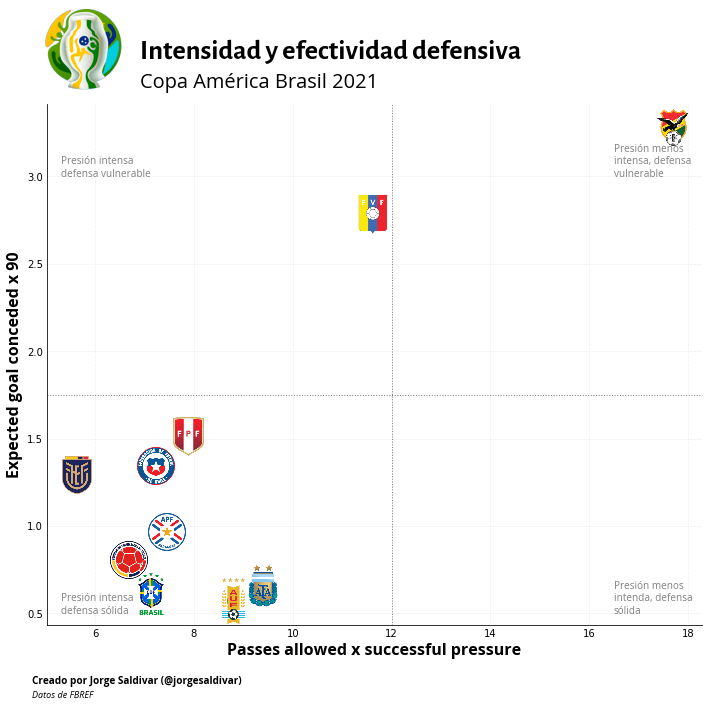

In [701]:
fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)

x = analysis_fdf.loc[analysis_fdf['player']=='Opponent Total','pass_allowed/succ_press'].values
y = analysis_fdf.loc[analysis_fdf['player']=='Opponent Total','per90minutes_xg'].values


ax.scatter(x, y, s=120, color=analysis_fdf.loc[analysis_fdf['player']=='Opponent Total','country'].map(colors), 
           alpha=0.8, lw=1, zorder=2, edgecolor='black')

# add horizontal line
ax.axhline(y=np.median(ax.get_yticks()), color='gray', linestyle='dotted', lw=1)
# add vertical line
ax.axvline(x=np.median(ax.get_xticks()), color='gray', linestyle='dotted', lw=1)


fig.text(0.2,1.06,"Intensidad y efectividad defensiva",fontweight="bold", fontsize=28, 
         fontfamily=title_font, color=text_color)
fig.text(0.2,1.01,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, 
         color=text_color)

ax.set_xlabel("Passes allowed x successful pressure", fontfamily=body_font, fontweight="bold", fontsize=16, 
              color=text_color)
ax.set_ylabel("Expected goal conceded x 90", fontfamily=body_font, fontweight="bold", fontsize= 16, 
              color=text_color)

ax.tick_params(axis="both",length=0)


spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

# add understanding info
ax.annotate('Presión menos\nintensa, defensa\nvulnerable',(16.5, 3), fontfamily=body_font, 
            fontweight="regular", fontsize=10, color='gray', zorder=3)
ax.annotate('Presión menos\nintenda, defensa\nsólida',(16.5, 0.5), fontfamily=body_font, 
            fontweight="regular", fontsize=10, color='gray', zorder=3)
ax.annotate('Presión intensa\ndefensa sólida',(5.3, 0.5), fontfamily=body_font, 
            fontweight="regular", fontsize=10, color='gray', zorder=3)
ax.annotate('Presión intensa\ndefensa vulnerable',(5.3, 3), fontfamily=body_font, 
            fontweight="regular", fontsize=10, color='gray', zorder=3)

ax2 = fig.add_axes([0.02,1,0.20,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)
        
# add teams' images
for x0, y0, country in zip(x, y, countries):
    img = OffsetImage(plt.imread(f"imgs/logos/{country}.png"), zoom=0.25)
    ab = AnnotationBbox(img, (x0, y0), frameon=False)
    ax.add_artist(ab)
        
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.025, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF"
fig.text(0.05, -0.05, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.savefig("outputs/defensive_intensity_effectiveness.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()

## 7. Defensive intensity vs. effectiveness

This analysis is inspired in [@exceedingxpuns](https://twitter.com/exceedingxpuns) who published the analysis [here](https://twitter.com/exceedingxpuns/status/1464234592118788099). It involves data about `carries` and `xG`.

### Load data

In [607]:
# load passing
passing_df = pd.DataFrame()
for country in countries:
    if passing_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_passing.csv")
        aux_df['country'] = country
        passing_df = passing_df.append(aux_df, ignore_index=True, sort=False)
    else:
        passing_df = pd.read_csv(f"data/{country}_passing.csv")
        passing_df['country'] = country        

In [608]:
# load defensive actions
defensive_df = pd.DataFrame()
for country in countries:
    if defensive_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_defensive_actions.csv")
        aux_df['country'] = country
        defensive_df = defensive_df.append(aux_df, ignore_index=True, sort=False)
    else:
        defensive_df = pd.read_csv(f"data/{country}_defensive_actions.csv")
        defensive_df['country'] = country        

In [609]:
# load standard
standard_df = pd.DataFrame()
for country in countries:
    if standard_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_standard.csv")
        aux_df['country'] = country
        standard_df = standard_df.append(aux_df, ignore_index=True, sort=False)
    else:
        standard_df = pd.read_csv(f"data/{country}_standard.csv")
        standard_df['country'] = country        

In [601]:
# merge datasets
analysis_df = pd.merge(passing_df, defensive_df, how='inner', 
                       on=['player', 'pos', 'age', '90s', 'matches', 'country'])
analysis_df = pd.merge(analysis_df, standard_df, how='inner',
                       on=['player', 'pos', 'age', 'matches', 'country'])